# Data Exploration and Analysis

This notebook explores the market data available for the Quantitative Stochastic Volatility Machine Learning (QSML) project.

## Overview
- **Equity Data**: OHLCV data for major stocks (AAPL, MSFT, GOOGL, SPY, QQQ)
- **Treasury Data**: Yield curves from 1-month to 30-year maturities
- **Options Data**: SPY options chain with strikes, premiums, and implied volatilities

## Objectives
1. Load and examine data quality
2. Perform statistical analysis
3. Visualize market trends and patterns
4. Analyze volatility structures
5. Examine yield curve dynamics

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Inspection

In [2]:
# Define data paths
data_dir = Path('../data')
equity_dir = data_dir / 'raw' / 'equities'
options_dir = data_dir / 'raw' / 'options'
external_dir = data_dir / 'external'

print(f"Data directory: {data_dir.absolute()}")
print(f"Equity data: {equity_dir.exists()}")
print(f"Options data: {options_dir.exists()}")
print(f"External data: {external_dir.exists()}")

Data directory: /Users/msoumad/Workspace/finance_projects/QSML/QSML/notebooks/../data
Equity data: True
Options data: True
External data: True


In [3]:
# Load equity data
equity_files = list(equity_dir.glob('*.csv'))
print(f"Found {len(equity_files)} equity files:")
for file in equity_files:
    print(f"  - {file.name}")

# Load combined equity data
equity_data = pd.read_csv(equity_dir / 'combined_equities.csv')
equity_data['Date'] = pd.to_datetime(equity_data['Date'])

print(f"\nEquity data shape: {equity_data.shape}")
print(f"Date range: {equity_data['Date'].min()} to {equity_data['Date'].max()}")
print(f"Symbols: {equity_data['Symbol'].unique()}")

Found 6 equity files:
  - QQQ.csv
  - combined_equities.csv
  - MSFT.csv
  - SPY.csv
  - GOOGL.csv
  - AAPL.csv

Equity data shape: (5220, 7)
Date range: 2020-01-01 00:00:00 to 2024-01-01 00:00:00
Symbols: ['AAPL' 'MSFT' 'GOOGL' 'SPY' 'QQQ']


In [4]:
# Display first few rows of equity data
print("Equity Data Sample:")
display(equity_data.head(10))

print("\nEquity Data Info:")
equity_data.info()

Equity Data Sample:


,Date,Open,High,Low,Close,Volume,Symbol
0,2020-01-01,149.870530,152.286543,147.084734,151.207227,505593,AAPL
1,2020-01-02,151.875306,154.359419,147.354703,150.907528,547946,AAPL
2,2020-01-03,151.399730,153.268823,151.399730,152.484178,786140,AAPL
3,2020-01-06,151.282304,156.955233,151.282304,156.216015,467999,AAPL
4,2020-01-07,157.369311,157.369311,153.338321,155.671130,545178,AAPL
5,2020-01-08,156.745332,157.910401,152.633446,155.128187,426287,AAPL
6,2020-01-09,154.642974,161.668432,154.642974,159.065410,390095,AAPL
7,2020-01-10,159.380203,161.222819,159.380203,161.030681,421668,AAPL
8,2020-01-13,161.428452,161.563549,157.743412,159.875413,433928,AAPL
9,2020-01-14,160.083789,164.000928,155.875580,161.278520,562943,AAPL



Equity Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5220 non-null   datetime64[ns]
 1   Open    5220 non-null   float64       
 2   High    5220 non-null   float64       
 3   Low     5220 non-null   float64       
 4   Close   5220 non-null   float64       
 5   Volume  5220 non-null   int64         
 6   Symbol  5220 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 285.6+ KB


In [5]:
# Load treasury data
treasury_data = pd.read_csv(external_dir / 'treasury_yields.csv')
treasury_data['Date'] = pd.to_datetime(treasury_data['Date'])

print(f"Treasury data shape: {treasury_data.shape}")
print(f"Date range: {treasury_data['Date'].min()} to {treasury_data['Date'].max()}")
print(f"Yield columns: {[col for col in treasury_data.columns if 'DGS' in col]}")

display(treasury_data.head())

Treasury data shape: (1462, 9)
Date range: 2020-01-01 00:00:00 to 2024-01-01 00:00:00
Yield columns: ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1YR', 'DGS2YR', 'DGS5YR', 'DGS10YR', 'DGS30YR']


,Date,DGS1MO,DGS3MO,DGS6MO,DGS1YR,DGS2YR,DGS5YR,DGS10YR,DGS30YR
0,2020-01-01,0.501490,0.799373,1.200275,1.797941,2.197236,2.798649,3.197636,3.795529
1,2020-01-02,0.501075,0.796821,1.201032,1.793643,2.195539,2.796381,3.199607,3.795969
2,2020-01-03,0.503018,0.795080,1.200683,1.794081,2.196269,2.797053,3.203908,3.799453
3,2020-01-04,0.507588,0.796846,1.201327,1.795837,2.194858,2.791213,3.199776,3.798898
4,2020-01-05,0.506885,0.801855,1.206062,1.797381,2.196695,2.787860,3.198746,3.794381


In [6]:
# Load options data
options_data = pd.read_csv(options_dir / 'spy_options.csv')
options_data['Date'] = pd.to_datetime(options_data['Date'])
options_data['Expiration'] = pd.to_datetime(options_data['Expiration'])

print(f"Options data shape: {options_data.shape}")
print(f"Option types: {options_data['Type'].unique()}")
print(f"Strike range: ${options_data['Strike'].min():.0f} - ${options_data['Strike'].max():.0f}")

display(options_data.head())

Options data shape: (768, 11)
Option types: ['C' 'P']
Strike range: $320 - $475


,Date,Symbol,Expiration,Strike,Type,Bid,Ask,Last,Volume,OpenInt,IV
0,2024-01-01,SPY,2024-02-15,320.0,C,91.571340,93.421266,92.496303,116,5291,0.222434
1,2024-01-01,SPY,2024-02-15,320.0,P,11.571340,13.421266,12.496303,710,5834,0.222434
2,2024-01-01,SPY,2024-02-15,325.0,C,85.861537,87.596113,86.728825,131,566,0.208773
3,2024-01-01,SPY,2024-02-15,325.0,P,10.861537,12.596113,11.728825,224,4526,0.208773
4,2024-01-01,SPY,2024-02-15,330.0,C,78.776565,80.368011,79.572288,881,8422,0.170387


## 2. Data Quality Assessment

In [7]:
# Check for missing values in equity data
print("Missing values in equity data:")
missing_equity = equity_data.isnull().sum()
print(missing_equity[missing_equity > 0])

# Check for missing values in treasury data
print("\nMissing values in treasury data:")
missing_treasury = treasury_data.isnull().sum()
print(missing_treasury[missing_treasury > 0])

# Check for missing values in options data
print("\nMissing values in options data:")
missing_options = options_data.isnull().sum()
print(missing_options[missing_options > 0])

Missing values in equity data:
Series([], dtype: int64)

Missing values in treasury data:
Series([], dtype: int64)

Missing values in options data:
Series([], dtype: int64)


In [8]:
# Check for data anomalies in equity data
print("Equity Data Anomalies Check:")

# Check for negative values
price_cols = ['Open', 'High', 'Low', 'Close']
for col in price_cols:
    negative_count = (equity_data[col] <= 0).sum()
    if negative_count > 0:
        print(f"  - {col}: {negative_count} negative/zero values")

# Check High >= Low, Open, Close
high_low_issues = (equity_data['High'] < equity_data['Low']).sum()
high_open_issues = (equity_data['High'] < equity_data['Open']).sum()
high_close_issues = (equity_data['High'] < equity_data['Close']).sum()

print(f"  - High < Low: {high_low_issues} cases")
print(f"  - High < Open: {high_open_issues} cases")
print(f"  - High < Close: {high_close_issues} cases")

# Check for volume anomalies
zero_volume = (equity_data['Volume'] == 0).sum()
print(f"  - Zero volume days: {zero_volume}")

Equity Data Anomalies Check:
  - High < Low: 0 cases
  - High < Open: 0 cases
  - High < Close: 0 cases
  - Zero volume days: 0


## 3. Statistical Analysis

In [9]:
# Basic statistics for equity data
print("Equity Data - Descriptive Statistics:")
equity_stats = equity_data.groupby('Symbol')[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
display(equity_stats.round(2))

Equity Data - Descriptive Statistics:


Open                                                                \
         count     mean     std      min      25%      50%      75%      max   
Symbol                                                                         
AAPL    1044.0   172.18   40.73   123.18   146.84   159.27   179.73   308.80   
GOOGL   1044.0  1698.92  386.66  1124.23  1381.26  1581.22  2050.11  2623.91   
MSFT    1044.0   256.51   46.60   159.73   237.26   251.42   282.41   378.10   
QQQ     1044.0   538.36  118.96   314.70   471.78   523.91   622.70   868.80   
SPY     1044.0   571.55  114.49   363.82   470.97   591.71   664.24   794.45   

          High                                                                \
         count     mean     std      min      25%      50%      75%      max   
Symbol                                                                         
AAPL    1044.0   174.88   41.52   124.90   149.15   161.27   182.60   309.73   
GOOGL   1044.0  1727.27  392.63  1149.94  1407.83  1615.60  2077.37  2724.14   
MSFT    1044.0   260.24   47.23   164.15   241.49   255.54   285.91   378.10   
QQQ     1044.0   545.96  120.54   321.64   479.34   530.63   630.25   879.82   
SPY     1044.0   577.99  115.75   366.71   475.30   597.46   670.52   807.13   

           Low                                                                \
         count     mean     std      min      25%      50%      75%      max   
Symbol                                                                         
AAPL    1044.0   169.57   40.35   121.52   144.86   156.74   176.10   306.51   
GOOGL   1044.0  1668.07  378.35  1119.00  1359.15  1557.28  2004.87  2580.11   
MSFT    1044.0   252.95   46.02   157.65   234.11   248.00   278.66   372.23   
QQQ     1044.0   531.93  117.85   310.02   465.16   516.40   616.94   863.61   
SPY     1044.0   565.38  113.19   360.18   466.92   585.44   655.87   788.34   

         Close                                                                \
         count     mean     std      min      25%      50%      75%      max   
Symbol                                                                         
AAPL    1044.0   172.29   40.95   123.71   146.92   158.99   179.37   309.03   
GOOGL   1044.0  1697.54  385.77  1125.26  1380.36  1577.76  2045.96  2619.71   
MSFT    1044.0   256.50   46.59   158.49   237.71   251.29   282.40   372.92   
QQQ     1044.0   539.00  119.19   315.35   472.02   524.30   624.18   869.02   
SPY     1044.0   571.75  114.41   362.91   470.62   591.41   663.98   794.96   

        Volume                                                         \
         count        mean        std       min        25%        50%   
Symbol                                                                  
AAPL    1044.0   506962.26  153194.78   50000.0  405267.50   513968.5   
GOOGL   1044.0   514653.83  156317.58   50000.0  415331.50   514858.5   
MSFT    1044.0   510424.33  147675.68   50000.0  411454.00   510994.5   
QQQ     1044.0   517948.37  153463.45   50000.0  412900.25   515641.0   
SPY     1044.0  1002703.35  313219.20  100000.0  785225.50  1004596.5   

                               
               75%        max  
Symbol                         
AAPL     608281.25  1008527.0  
GOOGL    616865.25  1024667.0  
MSFT     608180.25   953620.0  
QQQ      618136.75   991932.0  
SPY     1226939.50  2092214.0

In [10]:
# Calculate daily returns and volatility
equity_returns = equity_data.copy()
equity_returns = equity_returns.sort_values(['Symbol', 'Date'])

# Calculate returns for each symbol
equity_returns['Returns'] = equity_returns.groupby('Symbol')['Close'].pct_change()
equity_returns['Log_Returns'] = equity_returns.groupby('Symbol')['Close'].apply(lambda x: np.log(x / x.shift(1))).values

# Calculate rolling volatility (20-day) for each symbol
def calculate_rolling_vol(group):
    return group['Returns'].rolling(20, min_periods=20).std() * np.sqrt(252)

equity_returns['Volatility_20d'] = equity_returns.groupby('Symbol').apply(calculate_rolling_vol).values

print("Returns and Volatility Statistics:")
returns_stats = equity_returns.groupby('Symbol')[['Returns', 'Log_Returns', 'Volatility_20d']].describe()
display(returns_stats.round(4))

Returns and Volatility Statistics:


Returns                                                          \
         count    mean     std     min     25%     50%     75%     max   
Symbol                                                                   
AAPL    1043.0  0.0008  0.0154 -0.0496 -0.0097  0.0007  0.0105  0.0628   
GOOGL   1043.0 -0.0005  0.0173 -0.0576 -0.0119 -0.0011  0.0111  0.0616   
MSFT    1043.0 -0.0001  0.0147 -0.0408 -0.0102 -0.0005  0.0098  0.0463   
QQQ     1043.0  0.0010  0.0137 -0.0432 -0.0083  0.0007  0.0100  0.0517   
SPY     1043.0  0.0007  0.0115 -0.0324 -0.0075  0.0005  0.0089  0.0524   

       Log_Returns                                                          \
             count    mean     std     min     25%     50%     75%     max   
Symbol                                                                       
AAPL        1043.0  0.0007  0.0154 -0.0509 -0.0098  0.0007  0.0105  0.0609   
GOOGL       1043.0 -0.0007  0.0173 -0.0593 -0.0120 -0.0011  0.0110  0.0598   
MSFT        1043.0 -0.0002  0.0147 -0.0416 -0.0102 -0.0005  0.0097  0.0453   
QQQ         1043.0  0.0009  0.0137 -0.0442 -0.0084  0.0007  0.0100  0.0504   
SPY         1043.0  0.0006  0.0115 -0.0330 -0.0075  0.0005  0.0088  0.0511   

       Volatility_20d                                                          
                count    mean     std     min     25%     50%     75%     max  
Symbol                                                                         
AAPL           1024.0  0.2417  0.0390  0.1383  0.2126  0.2420  0.2697  0.3400  
GOOGL          1024.0  0.2717  0.0443  0.1505  0.2401  0.2723  0.3029  0.3911  
MSFT           1024.0  0.2309  0.0355  0.1411  0.2050  0.2273  0.2588  0.3236  
QQQ            1024.0  0.2159  0.0351  0.1161  0.1939  0.2159  0.2368  0.3144  
SPY            1024.0  0.1809  0.0280  0.1028  0.1606  0.1786  0.1994  0.2792

In [11]:
# Treasury yield statistics
print("Treasury Yields - Descriptive Statistics:")
yield_cols = [col for col in treasury_data.columns if 'DGS' in col]
treasury_stats = treasury_data[yield_cols].describe()
display(treasury_stats.round(4))

Treasury Yields - Descriptive Statistics:


,DGS1MO,DGS3MO,DGS6MO,DGS1YR,DGS2YR,DGS5YR,DGS10YR,DGS30YR
count,1462.0000,1462.0000,1462.0000,1462.0000,1462.0000,1462.0000,1462.0000,1462.0000
mean,0.5416,0.8576,1.1547,1.7597,2.1269,2.8287,3.1672,3.7516
std,0.0687,0.0285,0.0475,0.0324,0.0448,0.0381,0.0261,0.0517
min,0.4500,0.7914,1.0281,1.6677,2.0379,2.7426,3.0853,3.6604
25%,0.4825,0.8410,1.1288,1.7323,2.0876,2.8043,3.1522,3.7085
50%,0.5118,0.8548,1.1637,1.7692,2.1235,2.8217,3.1682,3.7353
75%,0.6071,0.8724,1.1901,1.7861,2.1734,2.8549,3.1821,3.8045
max,0.6978,0.9368,1.2538,1.8136,2.2018,2.9309,3.2359,3.8437


## 4. Data Visualization

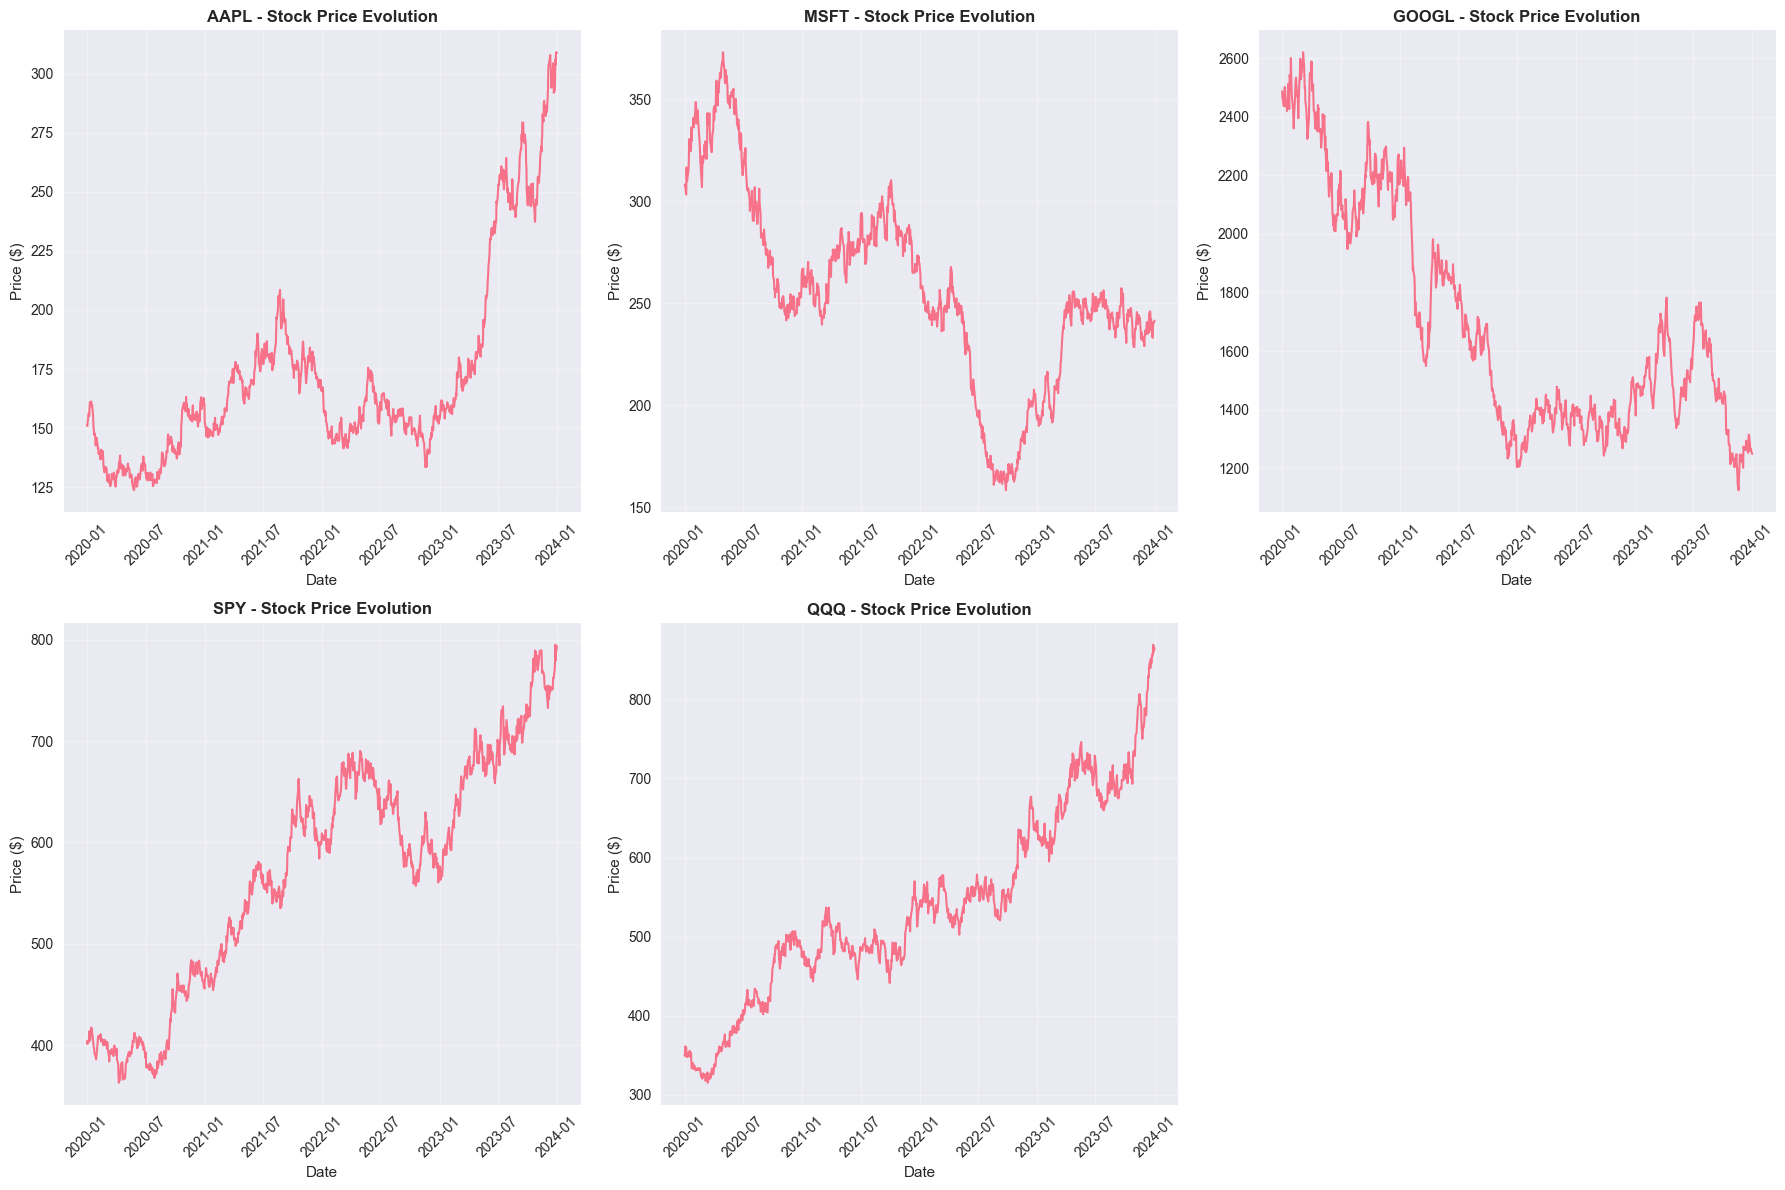

In [12]:
# Plot equity price evolution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

symbols = equity_data['Symbol'].unique()
for i, symbol in enumerate(symbols):
    symbol_data = equity_data[equity_data['Symbol'] == symbol]
    axes[i].plot(symbol_data['Date'], symbol_data['Close'], linewidth=1.5)
    axes[i].set_title(f'{symbol} - Stock Price Evolution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price ($)')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
if len(symbols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

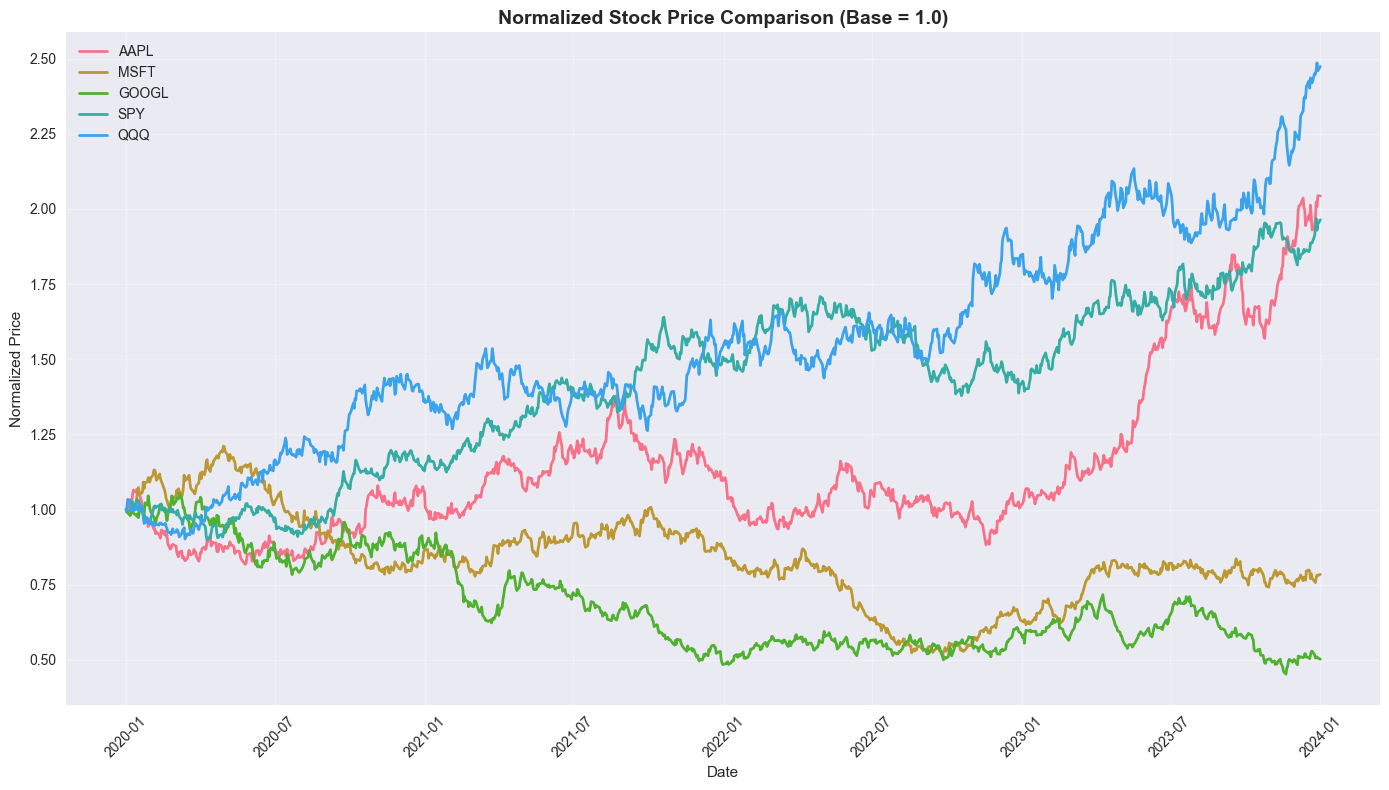

In [13]:
# Plot normalized price comparison
plt.figure(figsize=(14, 8))

for symbol in symbols:
    symbol_data = equity_data[equity_data['Symbol'] == symbol].copy()
    symbol_data['Normalized_Price'] = symbol_data['Close'] / symbol_data['Close'].iloc[0]
    plt.plot(symbol_data['Date'], symbol_data['Normalized_Price'], label=symbol, linewidth=2)

plt.title('Normalized Stock Price Comparison (Base = 1.0)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

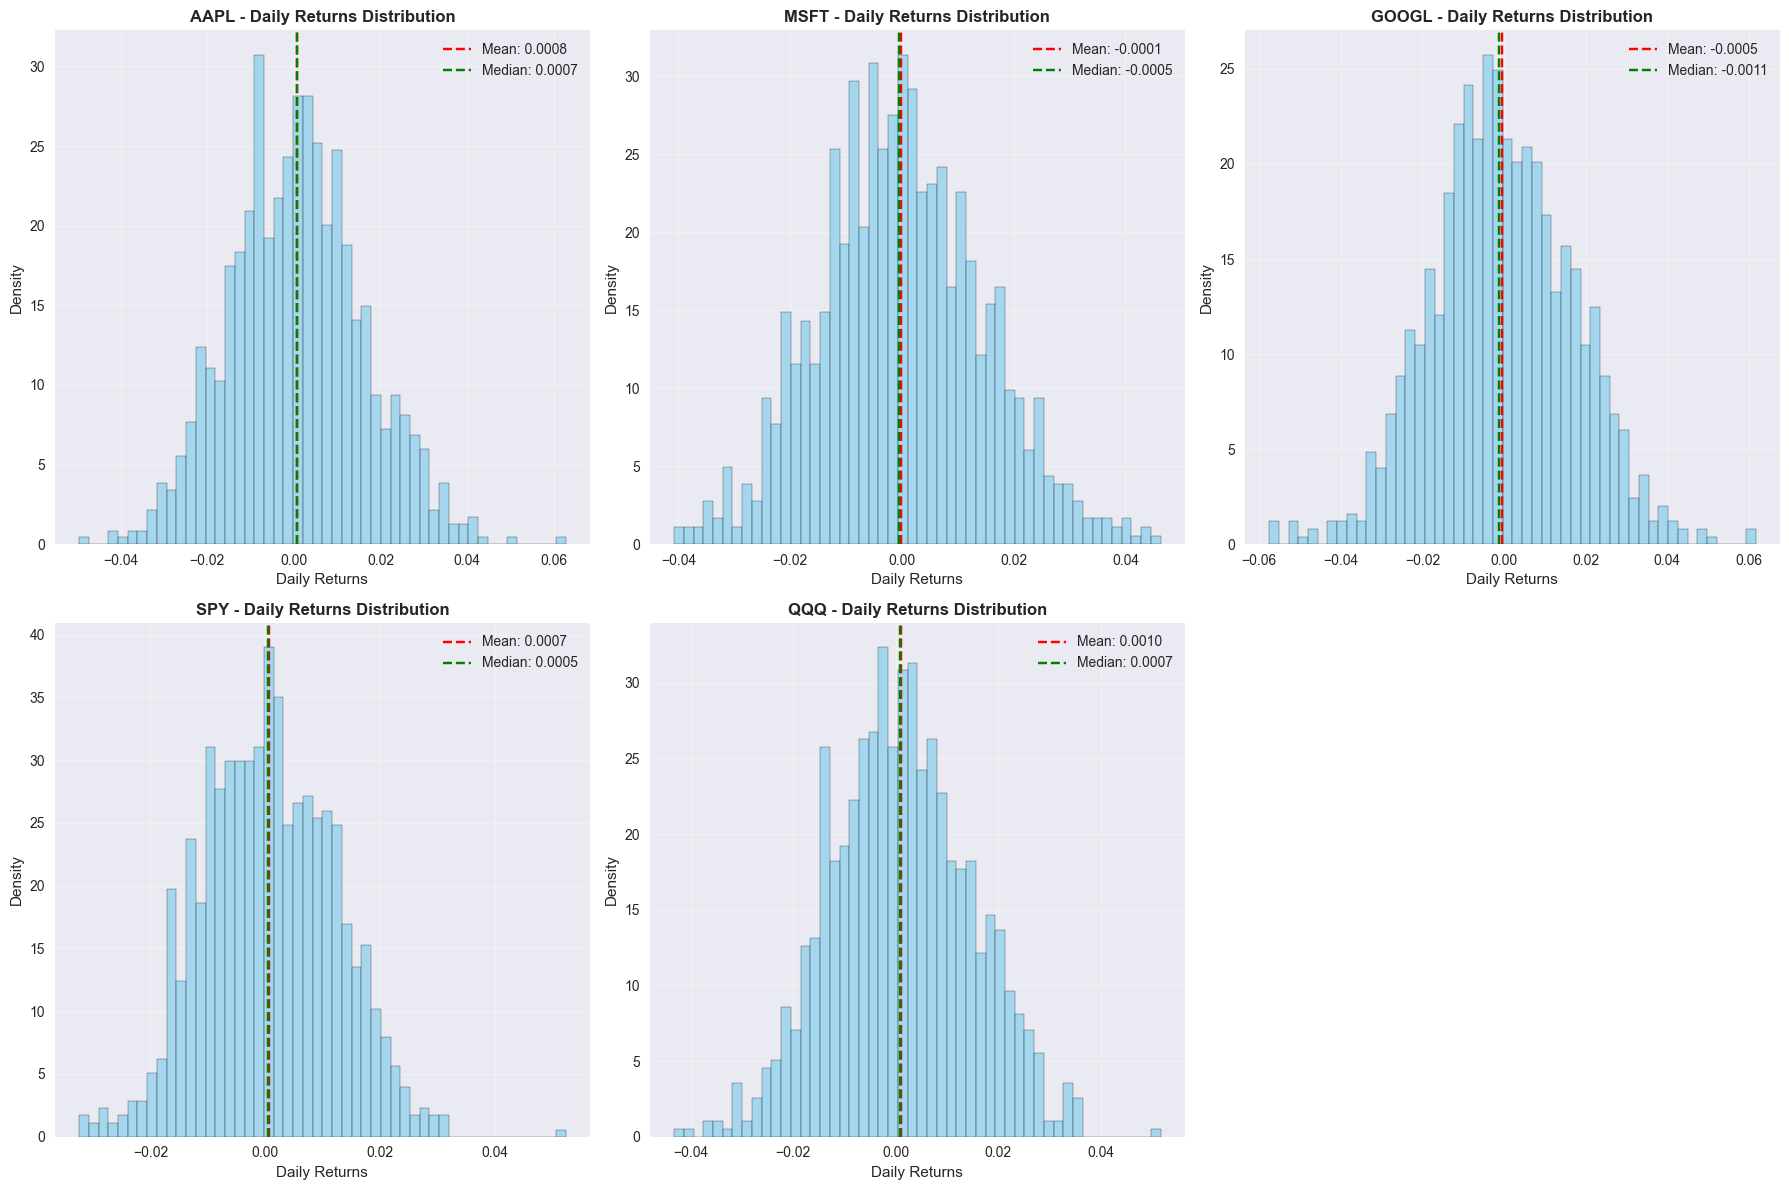

In [14]:
# Plot daily returns distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, symbol in enumerate(symbols):
    symbol_returns = equity_returns[equity_returns['Symbol'] == symbol]['Returns'].dropna()
    
    axes[i].hist(symbol_returns, bins=50, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[i].axvline(symbol_returns.mean(), color='red', linestyle='--', label=f'Mean: {symbol_returns.mean():.4f}')
    axes[i].axvline(symbol_returns.median(), color='green', linestyle='--', label=f'Median: {symbol_returns.median():.4f}')
    
    axes[i].set_title(f'{symbol} - Daily Returns Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
if len(symbols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

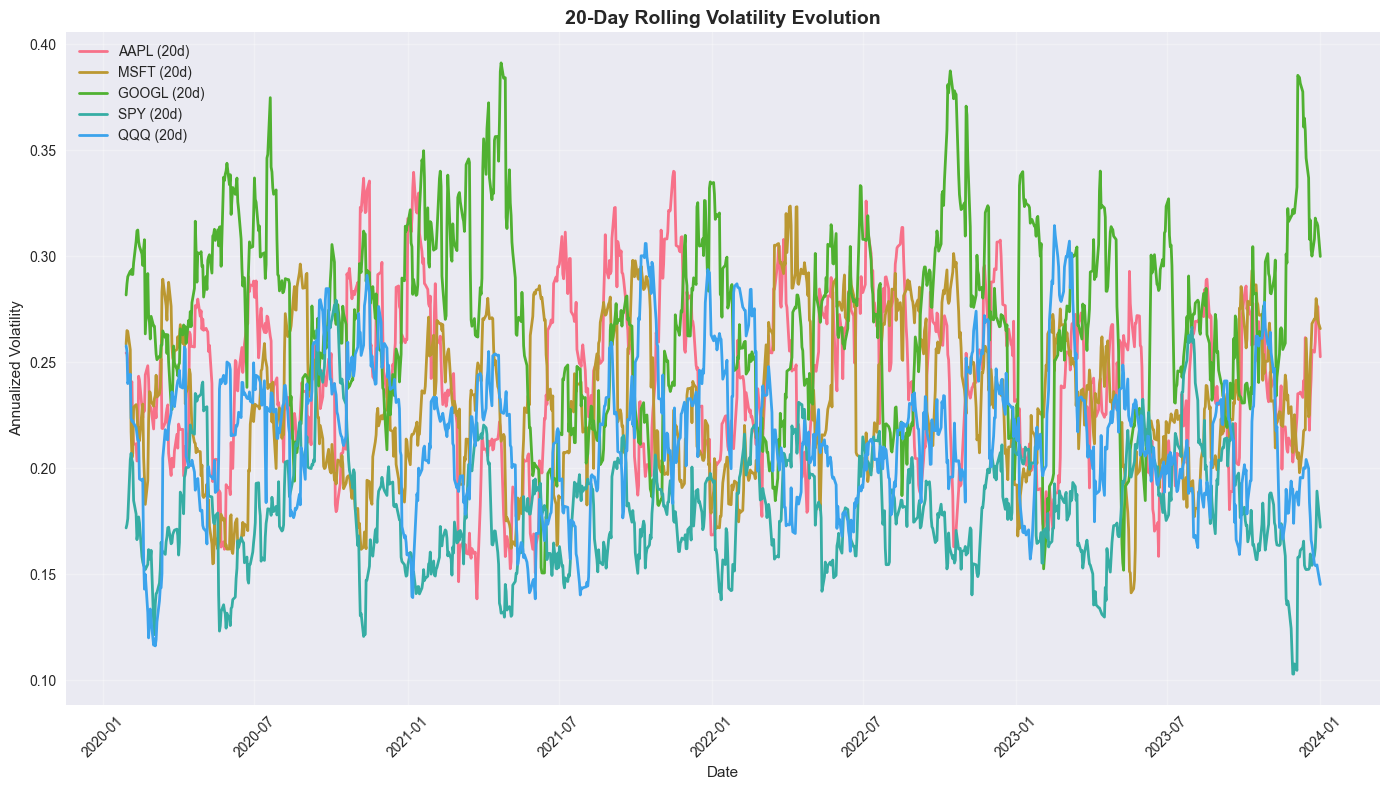

In [15]:
# Plot volatility evolution
plt.figure(figsize=(14, 8))

for symbol in symbols:
    symbol_vol = equity_returns[equity_returns['Symbol'] == symbol]
    plt.plot(symbol_vol['Date'], symbol_vol['Volatility_20d'], label=f'{symbol} (20d)', linewidth=2)

plt.title('20-Day Rolling Volatility Evolution', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Treasury Yield Analysis

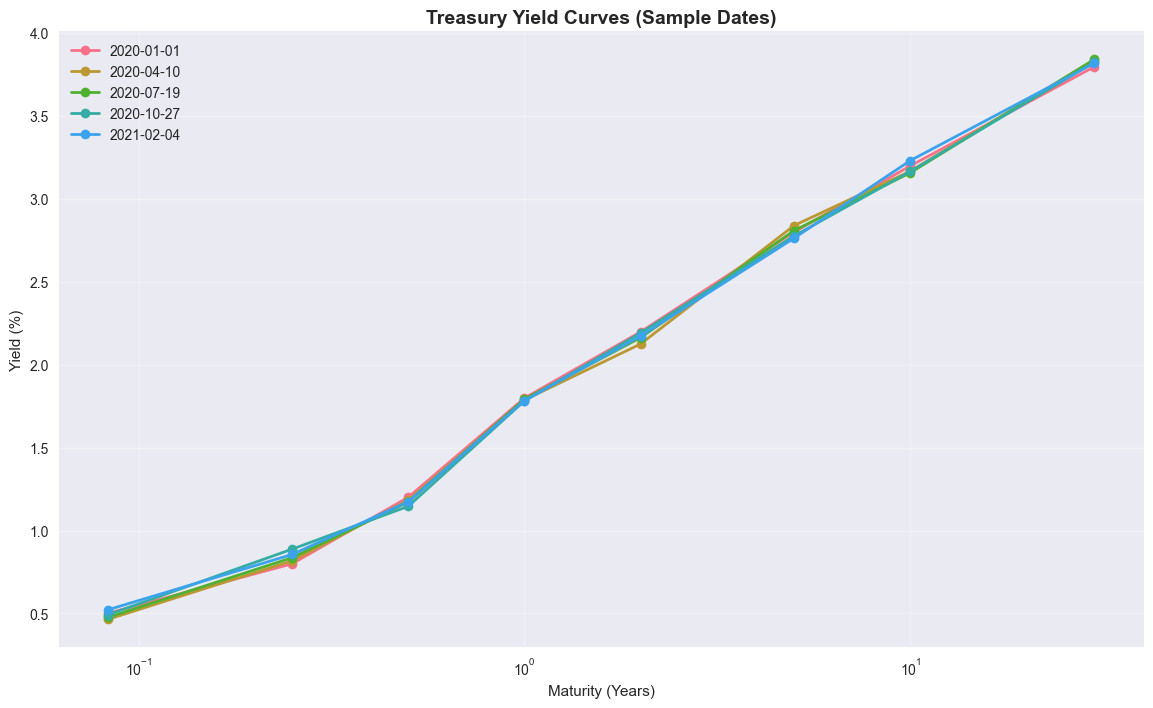

In [16]:
# Plot yield curve evolution
plt.figure(figsize=(14, 8))

# Sample some dates for yield curve visualization
sample_dates = treasury_data['Date'][::100]  # Every 100th day
maturities = ['1MO', '3MO', '6MO', '1YR', '2YR', '5YR', '10YR', '30YR']
maturity_years = [1/12, 3/12, 6/12, 1, 2, 5, 10, 30]  # Convert to years

for date in sample_dates[:5]:  # Plot first 5 sample dates
    date_data = treasury_data[treasury_data['Date'] == date]
    if not date_data.empty:
        yields = [date_data[f'DGS{mat}'].iloc[0] for mat in maturities]
        plt.plot(maturity_years, yields, marker='o', label=date.strftime('%Y-%m-%d'), linewidth=2)

plt.title('Treasury Yield Curves (Sample Dates)', fontsize=14, fontweight='bold')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.show()

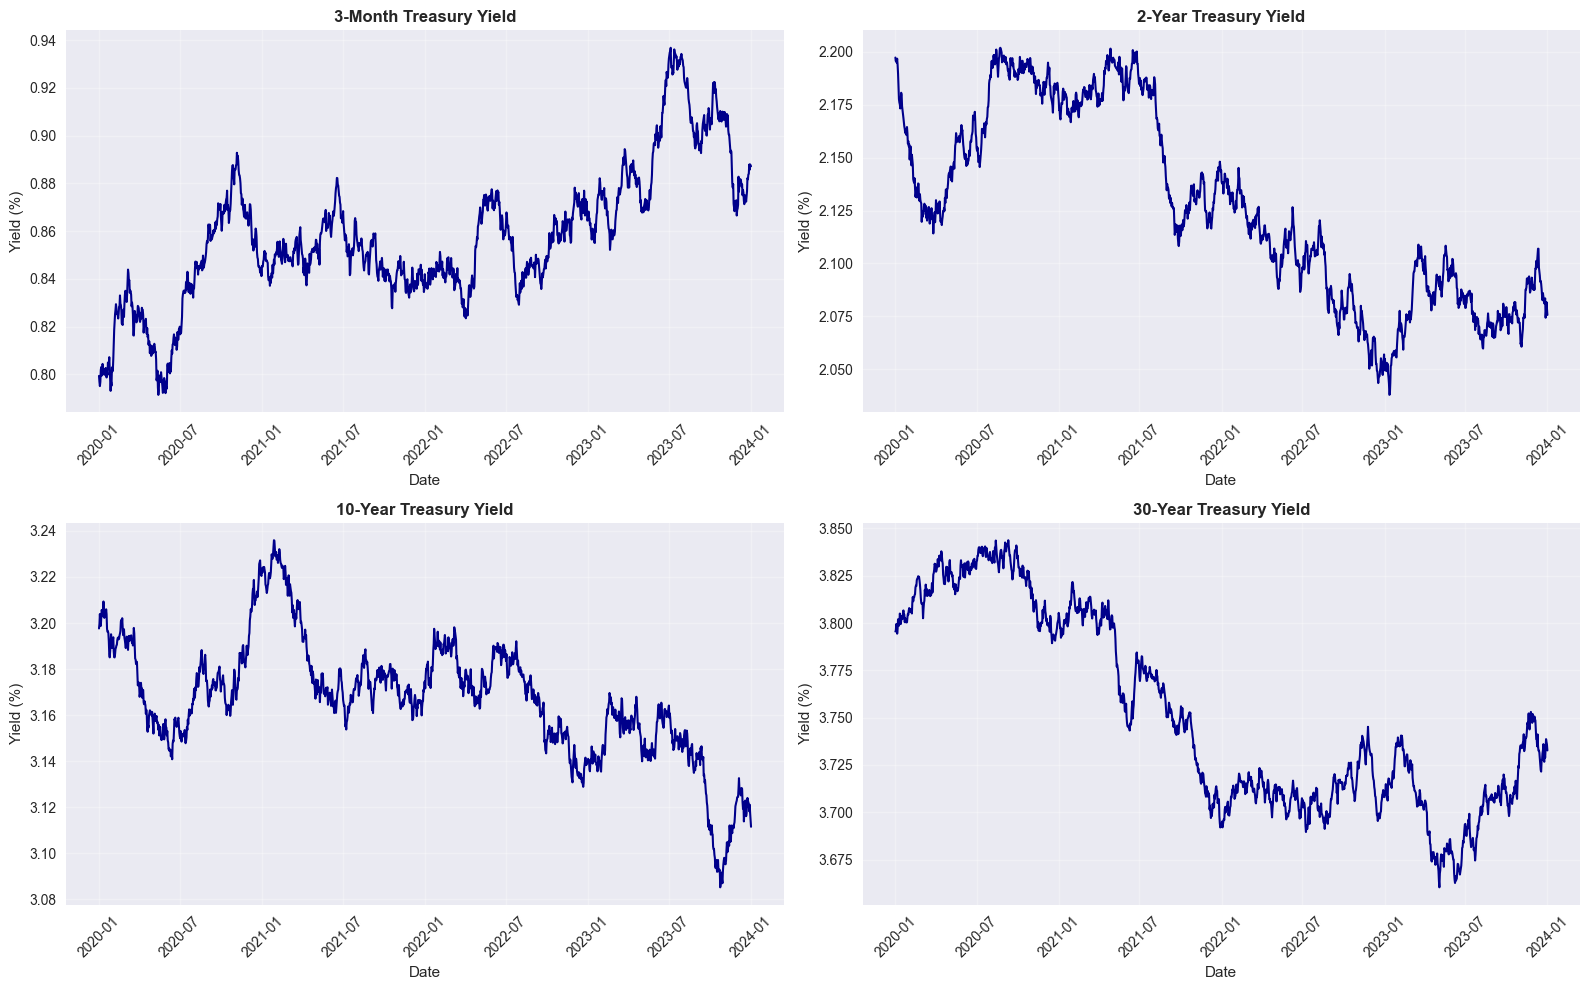

In [17]:
# Plot yield time series for key maturities
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
key_yields = ['DGS3MO', 'DGS2YR', 'DGS10YR', 'DGS30YR']
yield_names = ['3-Month', '2-Year', '10-Year', '30-Year']

for i, (yield_col, name) in enumerate(zip(key_yields, yield_names)):
    row, col = i // 2, i % 2
    axes[row, col].plot(treasury_data['Date'], treasury_data[yield_col], linewidth=1.5, color='darkblue')
    axes[row, col].set_title(f'{name} Treasury Yield', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Yield (%)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

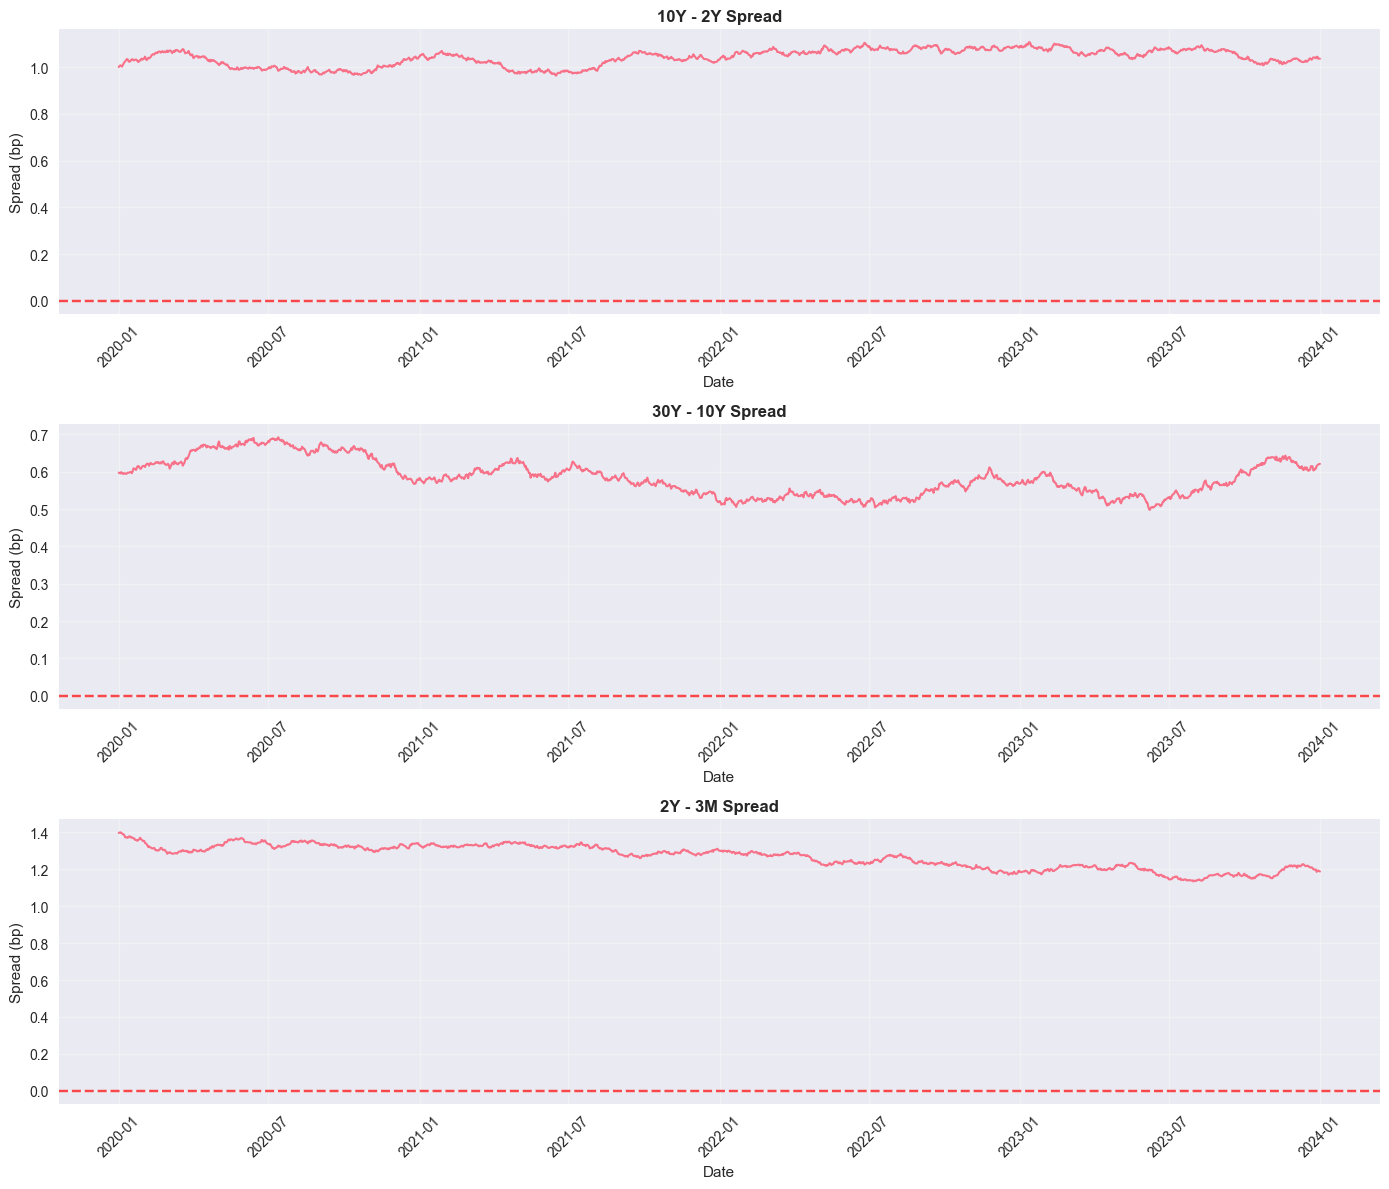

In [18]:
# Calculate and plot yield spreads
treasury_data['Spread_10Y_2Y'] = treasury_data['DGS10YR'] - treasury_data['DGS2YR']
treasury_data['Spread_30Y_10Y'] = treasury_data['DGS30YR'] - treasury_data['DGS10YR']
treasury_data['Spread_2Y_3M'] = treasury_data['DGS2YR'] - treasury_data['DGS3MO']

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

spreads = ['Spread_10Y_2Y', 'Spread_30Y_10Y', 'Spread_2Y_3M']
spread_names = ['10Y - 2Y Spread', '30Y - 10Y Spread', '2Y - 3M Spread']

for i, (spread_col, name) in enumerate(zip(spreads, spread_names)):
    axes[i].plot(treasury_data['Date'], treasury_data[spread_col], linewidth=1.5)
    axes[i].axhline(y=0, color='red', linestyle='--', alpha=0.7)
    axes[i].set_title(f'{name}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Spread (bp)')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Options Data Analysis

In [19]:
# Analyze options by type and moneyness
spy_price = 400  # Reference price for moneyness calculation
options_data['Moneyness'] = options_data['Strike'] / spy_price
options_data['DTE'] = (options_data['Expiration'] - options_data['Date']).dt.days

print("Options Data Analysis:")
print(f"Total options: {len(options_data)}")
print(f"Calls: {len(options_data[options_data['Type'] == 'C'])}")
print(f"Puts: {len(options_data[options_data['Type'] == 'P'])}")
print(f"\nDTE range: {options_data['DTE'].min()} - {options_data['DTE'].max()} days")
print(f"Moneyness range: {options_data['Moneyness'].min():.2f} - {options_data['Moneyness'].max():.2f}")

Options Data Analysis:
Total options: 768
Calls: 384
Puts: 384

DTE range: 45 - 380 days
Moneyness range: 0.80 - 1.19


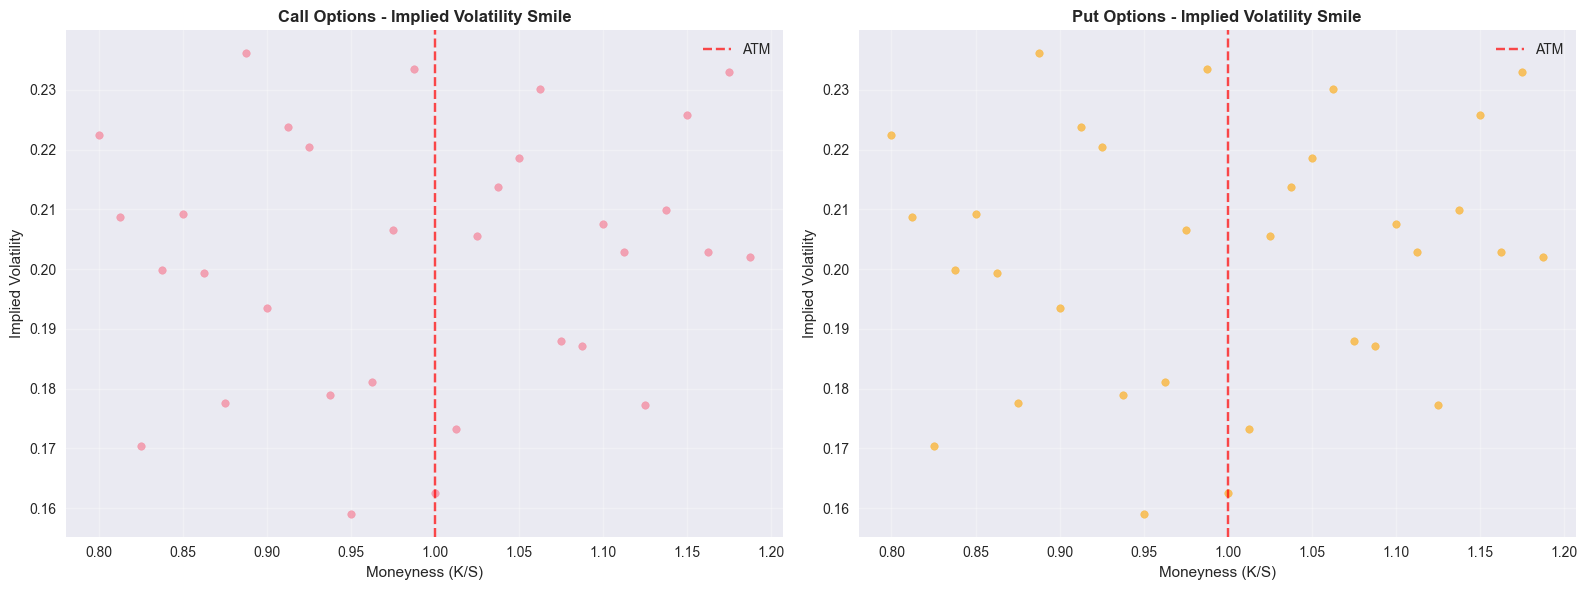

In [20]:
# Plot implied volatility smile
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Filter options with reasonable DTE (30-60 days)
short_term_options = options_data[(options_data['DTE'] >= 25) & (options_data['DTE'] <= 65)]

# Calls
calls = short_term_options[short_term_options['Type'] == 'C']
axes[0].scatter(calls['Moneyness'], calls['IV'], alpha=0.6, s=30)
axes[0].set_title('Call Options - Implied Volatility Smile', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Moneyness (K/S)')
axes[0].set_ylabel('Implied Volatility')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='ATM')
axes[0].legend()

# Puts
puts = short_term_options[short_term_options['Type'] == 'P']
axes[1].scatter(puts['Moneyness'], puts['IV'], alpha=0.6, s=30, color='orange')
axes[1].set_title('Put Options - Implied Volatility Smile', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Moneyness (K/S)')
axes[1].set_ylabel('Implied Volatility')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='ATM')
axes[1].legend()

plt.tight_layout()
plt.show()

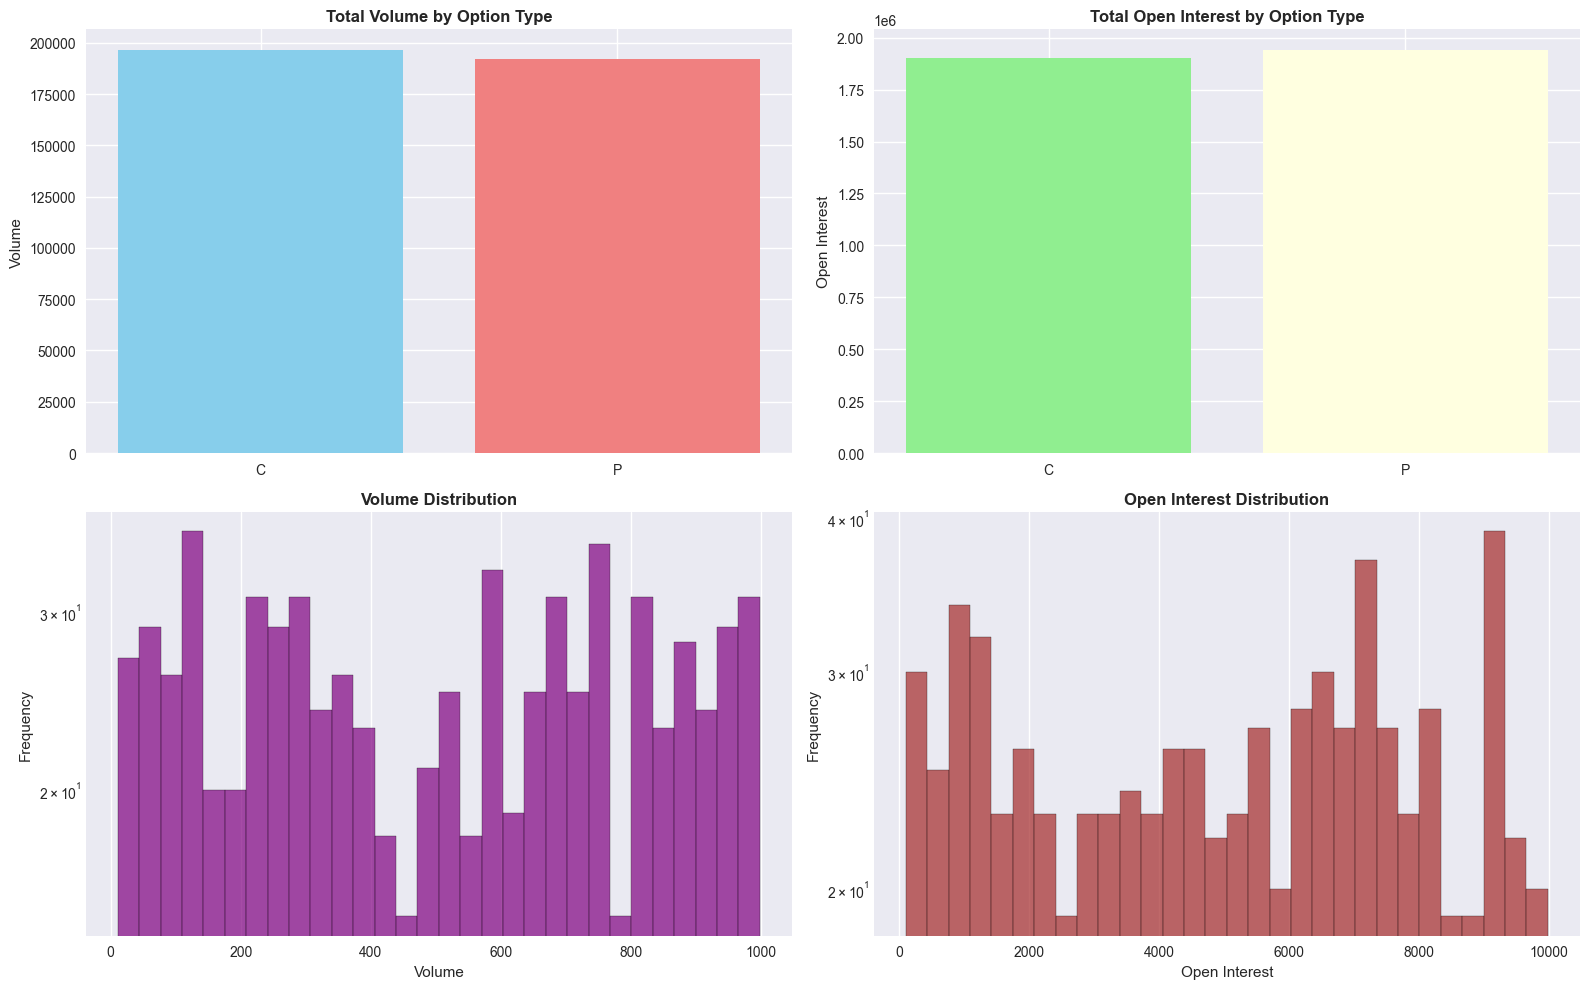

In [21]:
# Plot option volume and open interest
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Volume by option type
volume_by_type = options_data.groupby('Type')['Volume'].sum()
axes[0, 0].bar(volume_by_type.index, volume_by_type.values, color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Total Volume by Option Type', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Volume')

# Open Interest by option type
oi_by_type = options_data.groupby('Type')['OpenInt'].sum()
axes[0, 1].bar(oi_by_type.index, oi_by_type.values, color=['lightgreen', 'lightyellow'])
axes[0, 1].set_title('Total Open Interest by Option Type', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Open Interest')

# Volume distribution
axes[1, 0].hist(options_data['Volume'], bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_title('Volume Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Volume')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_yscale('log')

# Open Interest distribution
axes[1, 1].hist(options_data['OpenInt'], bins=30, alpha=0.7, color='brown', edgecolor='black')
axes[1, 1].set_title('Open Interest Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Open Interest')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

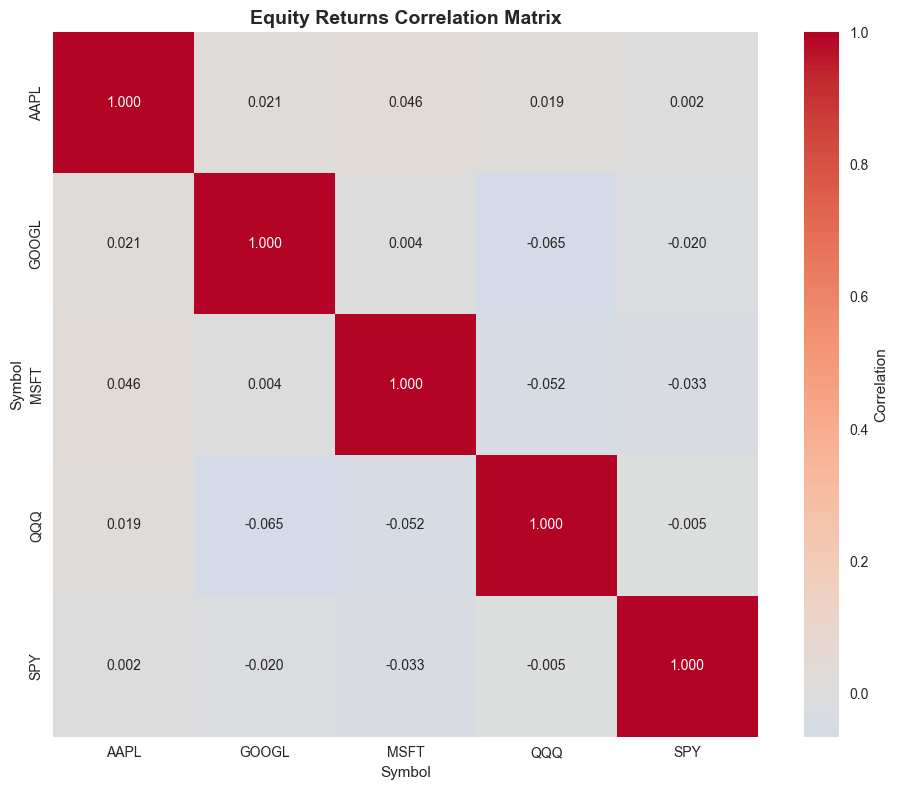

Correlation Matrix:


Symbol,AAPL,GOOGL,MSFT,QQQ,SPY
Symbol,,,,,
AAPL,1.000,0.021,0.046,0.019,0.002
GOOGL,0.021,1.000,0.004,-0.065,-0.020
MSFT,0.046,0.004,1.000,-0.052,-0.033
QQQ,0.019,-0.065,-0.052,1.000,-0.005
SPY,0.002,-0.020,-0.033,-0.005,1.000


In [22]:
# Create correlation matrix for equity returns
returns_pivot = equity_returns.pivot(index='Date', columns='Symbol', values='Returns')
returns_corr = returns_pivot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(returns_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Equity Returns Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
display(returns_corr.round(3))

Correlation between SPY returns and 10Y Treasury yield: 0.0014


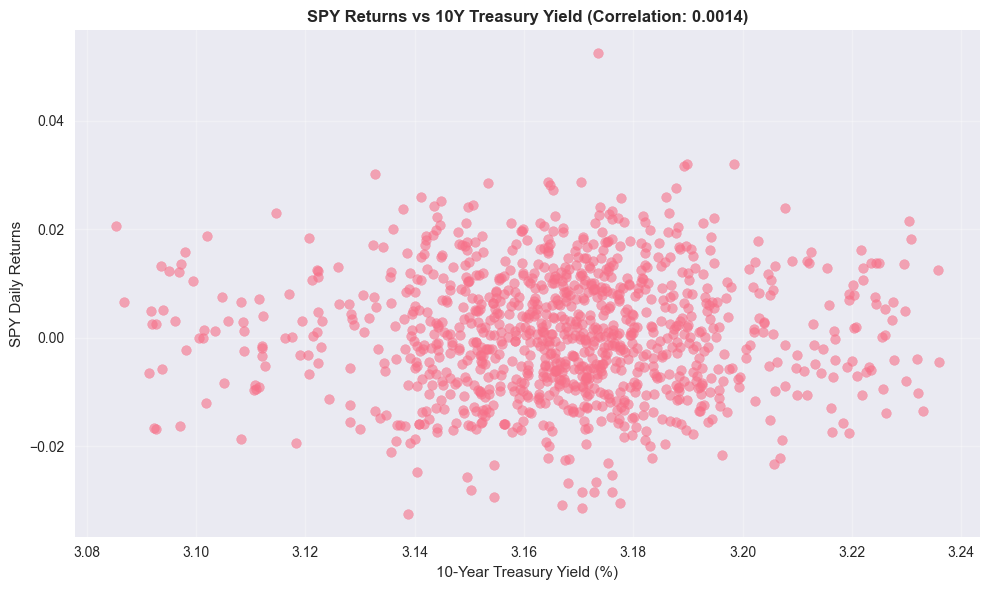

In [23]:
# Analyze correlation between equity returns and treasury yields
# Merge data on common dates
spy_data = equity_returns[equity_returns['Symbol'] == 'SPY'][['Date', 'Returns']].copy()
spy_data.columns = ['Date', 'SPY_Returns']

# Merge with treasury data
merged_data = pd.merge(spy_data, treasury_data[['Date', 'DGS10YR']], on='Date', how='inner')
merged_data = merged_data.dropna()

# Calculate correlation
if len(merged_data) > 0:
    correlation = merged_data['SPY_Returns'].corr(merged_data['DGS10YR'])
    print(f"Correlation between SPY returns and 10Y Treasury yield: {correlation:.4f}")
    
    # Plot scatter
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['DGS10YR'], merged_data['SPY_Returns'], alpha=0.6)
    plt.xlabel('10-Year Treasury Yield (%)')
    plt.ylabel('SPY Daily Returns')
    plt.title(f'SPY Returns vs 10Y Treasury Yield (Correlation: {correlation:.4f})', 
              fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No overlapping dates found between SPY and Treasury data")

## 8. Summary and Key Insights

In [24]:
# Generate summary statistics
print("=" * 60)
print("DATA EXPLORATION SUMMARY")
print("=" * 60)

print("\n📊 DATA OVERVIEW:")
print(f"  • Equity data: {len(equity_data):,} observations across {len(symbols)} symbols")
print(f"  • Treasury data: {len(treasury_data):,} daily observations")
print(f"  • Options data: {len(options_data):,} option contracts")
print(f"  • Date range: {equity_data['Date'].min().strftime('%Y-%m-%d')} to {equity_data['Date'].max().strftime('%Y-%m-%d')}")

print("\n📈 KEY STATISTICS:")
avg_returns = equity_returns.groupby('Symbol')['Returns'].mean() * 252  # Annualized
avg_volatility = equity_returns.groupby('Symbol')['Returns'].std() * np.sqrt(252)  # Annualized

for symbol in symbols:
    print(f"  • {symbol}: Avg Return = {avg_returns[symbol]:.2%}, Volatility = {avg_volatility[symbol]:.2%}")

print("\n💰 TREASURY YIELDS:")
current_yields = treasury_data.iloc[-1]
print(f"  • 3M: {current_yields['DGS3MO']:.2f}%")
print(f"  • 2Y: {current_yields['DGS2YR']:.2f}%")
print(f"  • 10Y: {current_yields['DGS10YR']:.2f}%")
print(f"  • 30Y: {current_yields['DGS30YR']:.2f}%")

print("\n🎯 OPTIONS INSIGHTS:")
avg_iv_calls = options_data[options_data['Type'] == 'C']['IV'].mean()
avg_iv_puts = options_data[options_data['Type'] == 'P']['IV'].mean()
print(f"  • Average Call IV: {avg_iv_calls:.2%}")
print(f"  • Average Put IV: {avg_iv_puts:.2%}")
print(f"  • Put-Call IV Skew: {avg_iv_puts - avg_iv_calls:.2%}")

print("\n✅ DATA QUALITY:")
total_missing = missing_equity.sum() + missing_treasury.sum() + missing_options.sum()
print(f"  • Total missing values: {total_missing}")
print(f"  • Data completeness: {((len(equity_data) + len(treasury_data) + len(options_data) - total_missing) / (len(equity_data) + len(treasury_data) + len(options_data)) * 100):.1f}%")

print("\n🎯 NEXT STEPS:")
print("  1. Model calibration using Black-Scholes and Heston models")
print("  2. Machine learning model training for volatility prediction")
print("  3. Risk analysis and Greeks computation")
print("  4. Hedging strategy development and backtesting")

print("\n" + "=" * 60)

DATA EXPLORATION SUMMARY

📊 DATA OVERVIEW:
  • Equity data: 5,220 observations across 5 symbols
  • Treasury data: 1,462 daily observations
  • Options data: 768 option contracts
  • Date range: 2020-01-01 to 2024-01-01

📈 KEY STATISTICS:
  • AAPL: Avg Return = 20.26%, Volatility = 24.52%
  • MSFT: Avg Return = -3.15%, Volatility = 23.36%
  • GOOGL: Avg Return = -12.87%, Volatility = 27.44%
  • SPY: Avg Return = 17.96%, Volatility = 18.21%
  • QQQ: Avg Return = 24.25%, Volatility = 21.72%

💰 TREASURY YIELDS:
  • 3M: 0.89%
  • 2Y: 2.08%
  • 10Y: 3.11%
  • 30Y: 3.73%

🎯 OPTIONS INSIGHTS:
  • Average Call IV: 20.57%
  • Average Put IV: 20.57%
  • Put-Call IV Skew: 0.00%

✅ DATA QUALITY:
  • Total missing values: 0
  • Data completeness: 100.0%

🎯 NEXT STEPS:
  1. Model calibration using Black-Scholes and Heston models
  2. Machine learning model training for volatility prediction
  3. Risk analysis and Greeks computation
  4. Hedging strategy development and backtesting

